In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("KNN_Project_Data")

In [3]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
data.isnull().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [8]:
data.corr()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,1.000000,-0.004816,-0.014219,0.055256,0.003688,0.001883,-0.023526,0.032118,-0.016091,0.026222,-0.079896
GWYH,-0.004816,1.000000,-0.224859,0.121623,-0.104795,0.042529,-0.102221,0.061553,0.039728,0.105532,-0.416168
TRAT,-0.014219,-0.224859,1.000000,-0.037726,0.124870,0.005462,0.118736,-0.073203,-0.067177,-0.119816,0.489347
TLLZ,0.055256,0.121623,-0.037726,1.000000,-0.005545,-0.004792,-0.063989,0.053958,0.094121,0.065143,-0.172029
IGGA,0.003688,-0.104795,0.124870,-0.005545,1.000000,0.003631,0.076304,-0.042134,-0.011688,-0.066895,0.295390
HYKR,0.001883,0.042529,0.005462,-0.004792,0.003631,1.000000,-0.007452,0.004891,0.025553,-0.006403,-0.015266
EDFS,-0.023526,-0.102221,0.118736,-0.063989,0.076304,-0.007452,1.000000,-0.071361,0.005865,-0.047928,0.281607
GUUB,0.032118,0.061553,-0.073203,0.053958,-0.042134,0.004891,-0.071361,1.000000,0.011507,0.061170,-0.174496
MGJM,-0.016091,0.039728,-0.067177,0.094121,-0.011688,0.025553,0.005865,0.011507,1.000000,0.014342,-0.098887
JHZC,0.026222,0.105532,-0.119816,0.065143,-0.066895,-0.006403,-0.047928,0.061170,0.014342,1.000000,-0.301725


<Axes: >

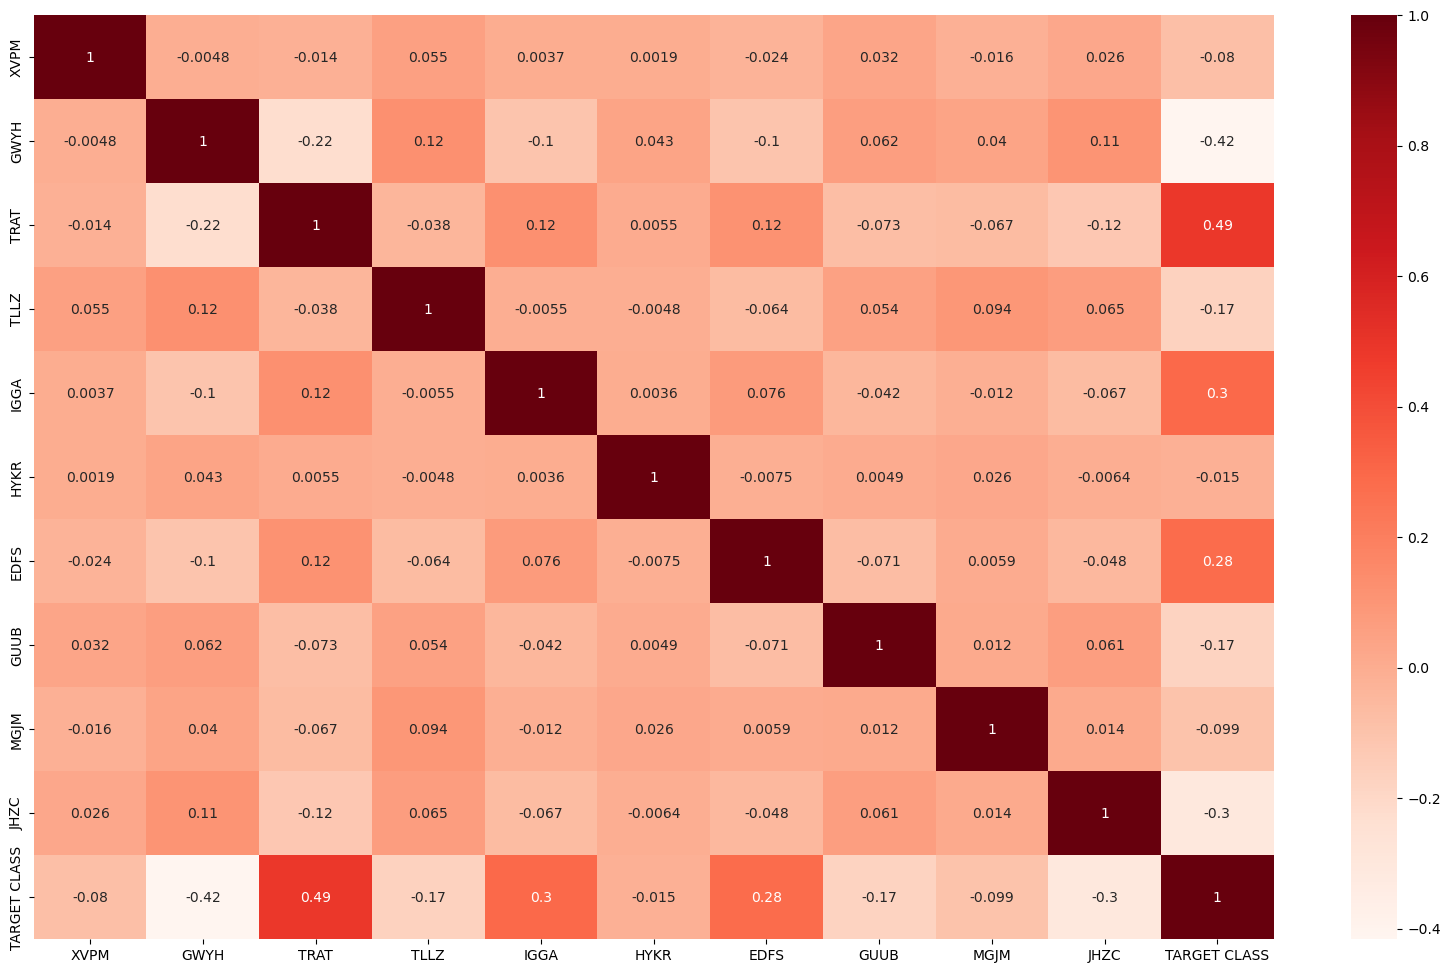

In [9]:
plt.figure(figsize=(20,12))
sbn.heatmap(data.corr(),annot = True, cmap='Reds')

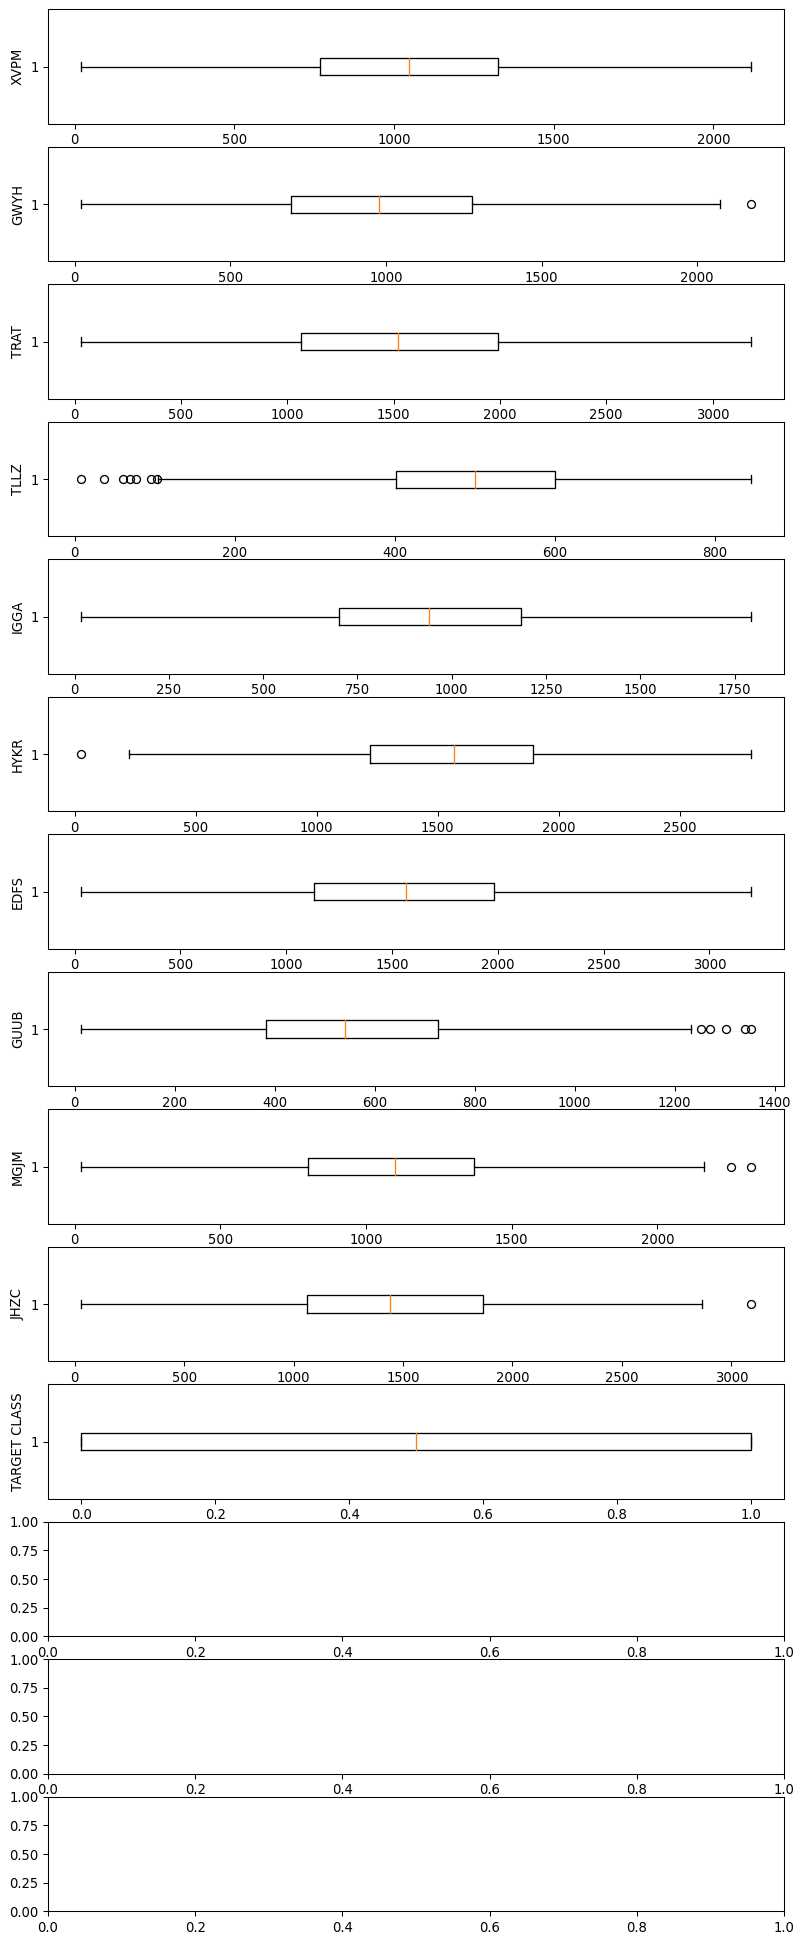

In [10]:
fig, axs = plt.subplots(14,1,dpi=95, figsize=(10,26))
i = 0
for col in data.columns:
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [12]:
q1, q3 = np.percentile(data['TLLZ'], [25, 75])

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

clean_data = data[(data['TLLZ'] >= lower_bound) 
                & (data['TLLZ'] <= upper_bound)]

q1, q3 = np.percentile(data['GUUB'], [25, 75])

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

clean_data = data[(data['GUUB'] >= lower_bound) 
                & (data['GUUB'] <= upper_bound)]

In [14]:
clean_data.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,1054.368208,990.636447,1526.403396,495.182649,941.049034,1552.795970,1562.485672,557.617305,1088.393196,1452.890833,0.501508
std,370.753625,392.595300,639.628925,143.029794,345.948836,493.355352,597.805135,242.285959,403.003113,569.058255,0.500249
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.000000
25%,767.227275,694.360364,1058.676342,401.741920,701.208336,1226.419873,1133.224660,380.741481,800.794778,1059.379133,0.000000
50%,1045.874430,977.003126,1520.110483,500.276062,939.484450,1566.993735,1566.335706,538.491829,1097.684197,1442.661535,1.000000
75%,1322.311761,1274.691257,1986.397480,600.832103,1182.655027,1893.463449,1981.807299,724.898981,1368.096310,1864.479862,1.000000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1232.344787,2321.000000,3089.000000,1.000000


In [15]:
from scipy import stats

In [20]:
df=stats.zscore(clean_data.drop('TARGET CLASS',axis=1))

In [21]:
df

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.571381,-0.439982,1.626122,-0.957173,-1.129728,0.133997,0.979332,-0.936924,1.009148,-1.068538
1,-0.110548,-1.052628,1.748357,-1.502222,0.638636,1.077477,-1.186737,-0.456136,0.259779,-1.040503
2,0.662949,-0.433534,0.781238,0.212508,-0.054494,2.027062,-1.244859,1.188756,2.184640,0.341605
3,0.013437,0.194267,-1.430303,-0.100413,-1.508442,-1.758499,-1.187636,-0.891761,0.163848,-0.003438
4,-0.097223,0.823253,-0.900632,1.605784,-0.283373,-0.369578,-1.099600,0.415011,-1.362793,0.785833
...,...,...,...,...,...,...,...,...,...,...
995,0.779055,0.760722,-1.750482,0.506318,0.173248,-1.284089,-1.802859,0.455848,0.090317,1.186305
996,-0.311741,0.387994,0.891059,-0.083524,-1.209727,0.304951,0.744869,-0.099530,-1.760496,-1.557197
997,-0.357218,-0.975131,0.843224,0.013466,-1.398651,0.050111,0.161860,-1.531039,-0.273220,0.862233
998,0.277146,-0.988505,0.035048,1.060640,1.141461,-0.197303,2.051667,-0.021594,0.437996,-0.212760


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X =df
y=clean_data['TARGET CLASS']
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=101)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn=KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
pred= knn.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix


In [29]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[103  44]
 [ 42 110]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       147
           1       0.71      0.72      0.72       152

    accuracy                           0.71       299
   macro avg       0.71      0.71      0.71       299
weighted avg       0.71      0.71      0.71       299



In [30]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!= y_test))

Text(0, 0.5, 'Eror rate')

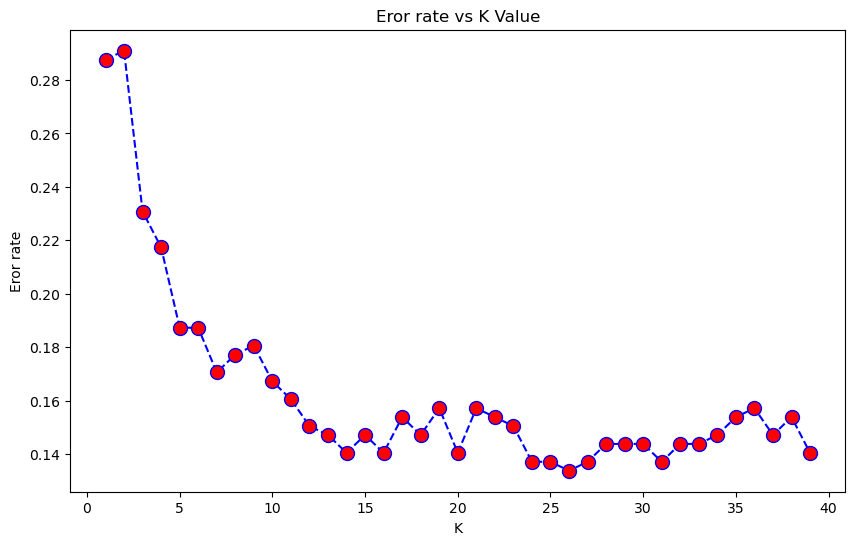

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title('Eror rate vs K Value')
plt.xlabel('K')
plt.ylabel('Eror rate')

In [32]:
knn=KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)



print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[126  21]
 [ 19 133]]


              precision    recall  f1-score   support

           0       0.87      0.86      0.86       147
           1       0.86      0.88      0.87       152

    accuracy                           0.87       299
   macro avg       0.87      0.87      0.87       299
weighted avg       0.87      0.87      0.87       299



In [33]:
knn=KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)



print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[124  23]
 [ 18 134]]


              precision    recall  f1-score   support

           0       0.87      0.84      0.86       147
           1       0.85      0.88      0.87       152

    accuracy                           0.86       299
   macro avg       0.86      0.86      0.86       299
weighted avg       0.86      0.86      0.86       299

